In [4]:
import os

In [5]:
folder_path = '../data/raw/ml-100k'
extracted_files = os.listdir(folder_path)
extracted_files.sort()
extracted_files

['README',
 'allbut.pl',
 'mku.sh',
 'u.data',
 'u.genre',
 'u.info',
 'u.item',
 'u.occupation',
 'u.user',
 'u1.base',
 'u1.test',
 'u2.base',
 'u2.test',
 'u3.base',
 'u3.test',
 'u4.base',
 'u4.test',
 'u5.base',
 'u5.test',
 'ua.base',
 'ua.test',
 'ub.base',
 'ub.test']

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Load and preprocess the data
ratings_df = pd.read_csv(folder_path+'/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
users_df = pd.read_csv(folder_path+'/u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])
movies_df = pd.read_csv(folder_path+'/u.item', sep='|', encoding='latin-1', names=['movie_id', 'title', 'release_date', 'video_release_date', 'IMDB_URL'] + ['genre'+str(i) for i in range(19)])
movies_df['release_year'] = movies_df['title'].str.extract(r'\((\d{4})\)')


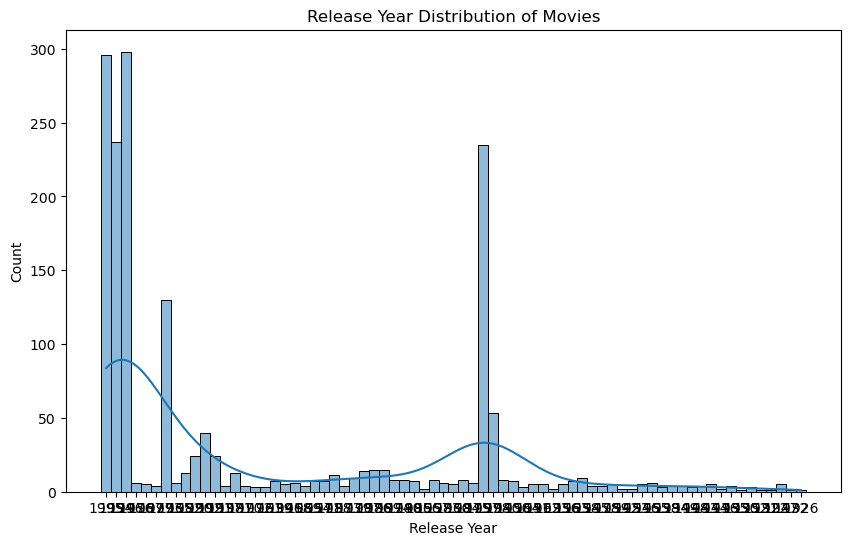

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['release_year'].dropna(), bins=30, kde=True)
plt.title('Release Year Distribution of Movies')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

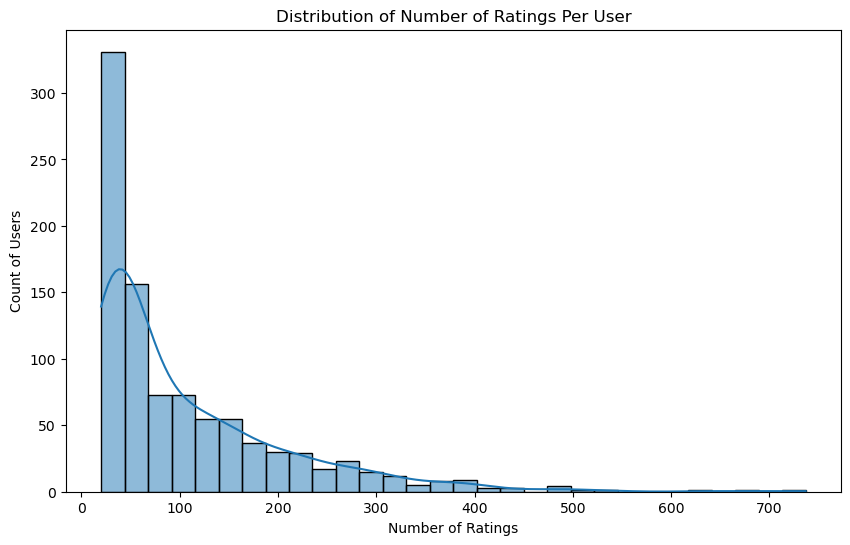

In [12]:
ratings_per_user = ratings_df.groupby('user_id').size()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=30, kde=True)
plt.title('Distribution of Number of Ratings Per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.show()


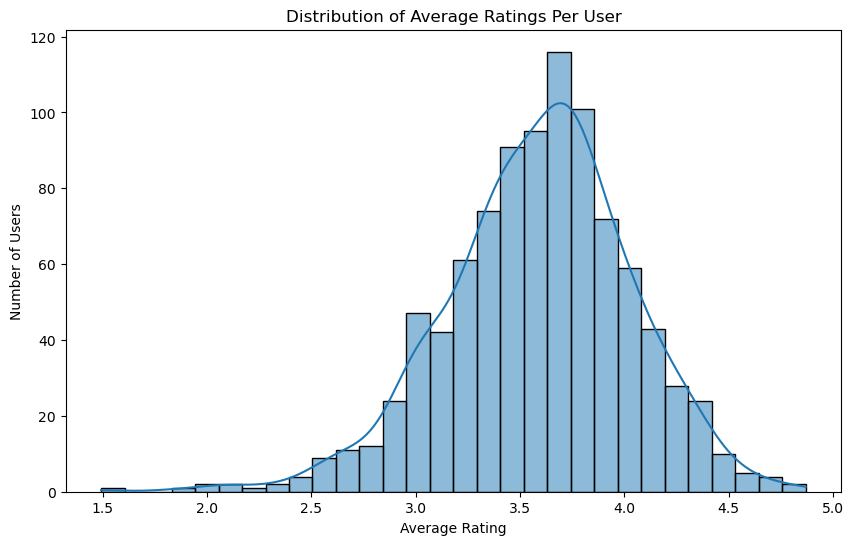

In [13]:
avg_ratings_per_user = ratings_df.groupby('user_id')['rating'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(avg_ratings_per_user, bins=30, kde=True)
plt.title('Distribution of Average Ratings Per User')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.show()


In [16]:
ratings_df['date'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df['year'] = ratings_df['date'].dt.year
ratings_df['month'] = ratings_df['date'].dt.month
avg_rating_per_year = ratings_df.groupby('year')['rating'].mean()
avg_rating_per_month = ratings_df.groupby('month')['rating'].mean()


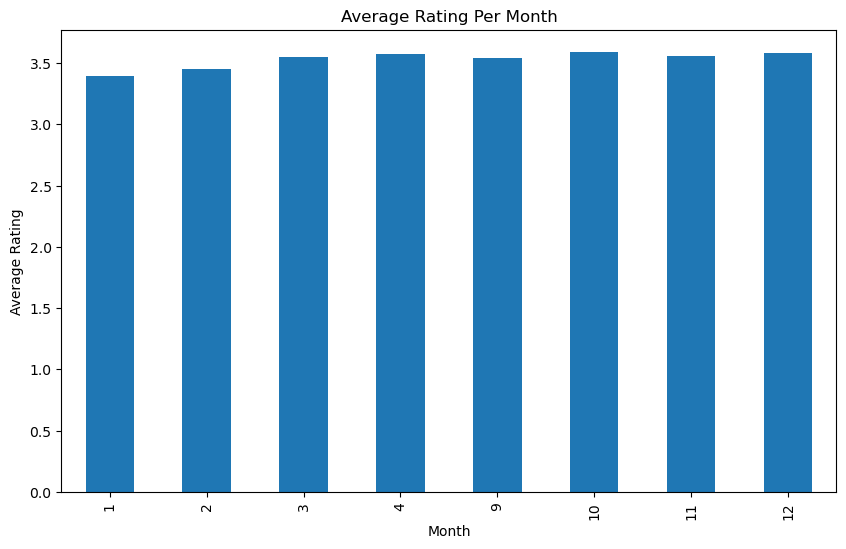

In [18]:
plt.figure(figsize=(10, 6))
avg_rating_per_month.plot(kind='bar')
plt.title('Average Rating Per Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.show()


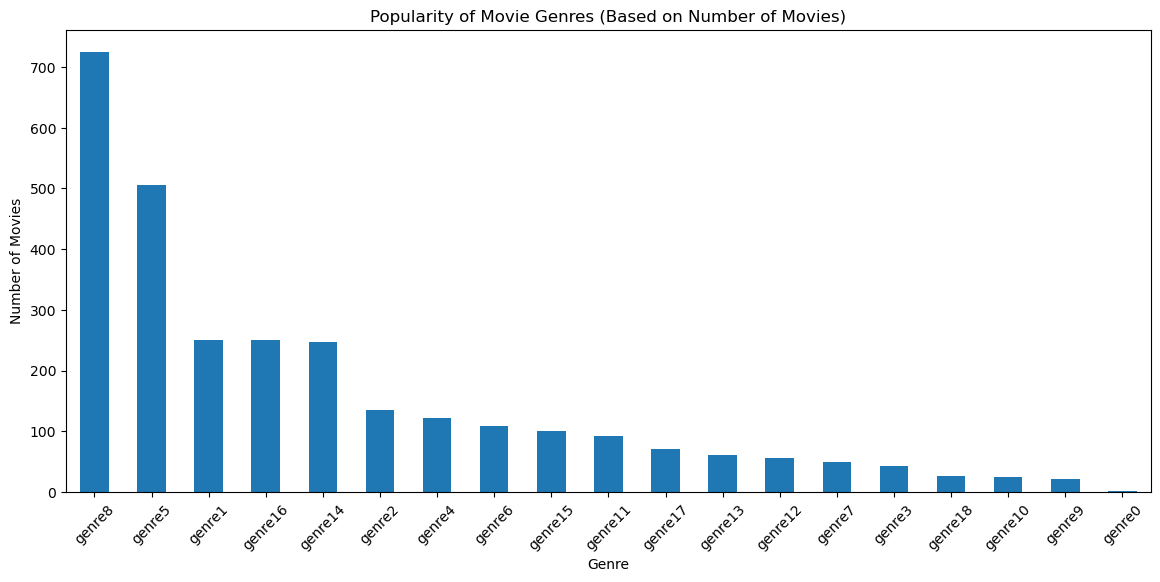

In [19]:
genre_columns = ['genre' + str(i) for i in range(19)]
genre_popularity = movies_df[genre_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
genre_popularity.plot(kind='bar')
plt.title('Popularity of Movie Genres (Based on Number of Movies)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


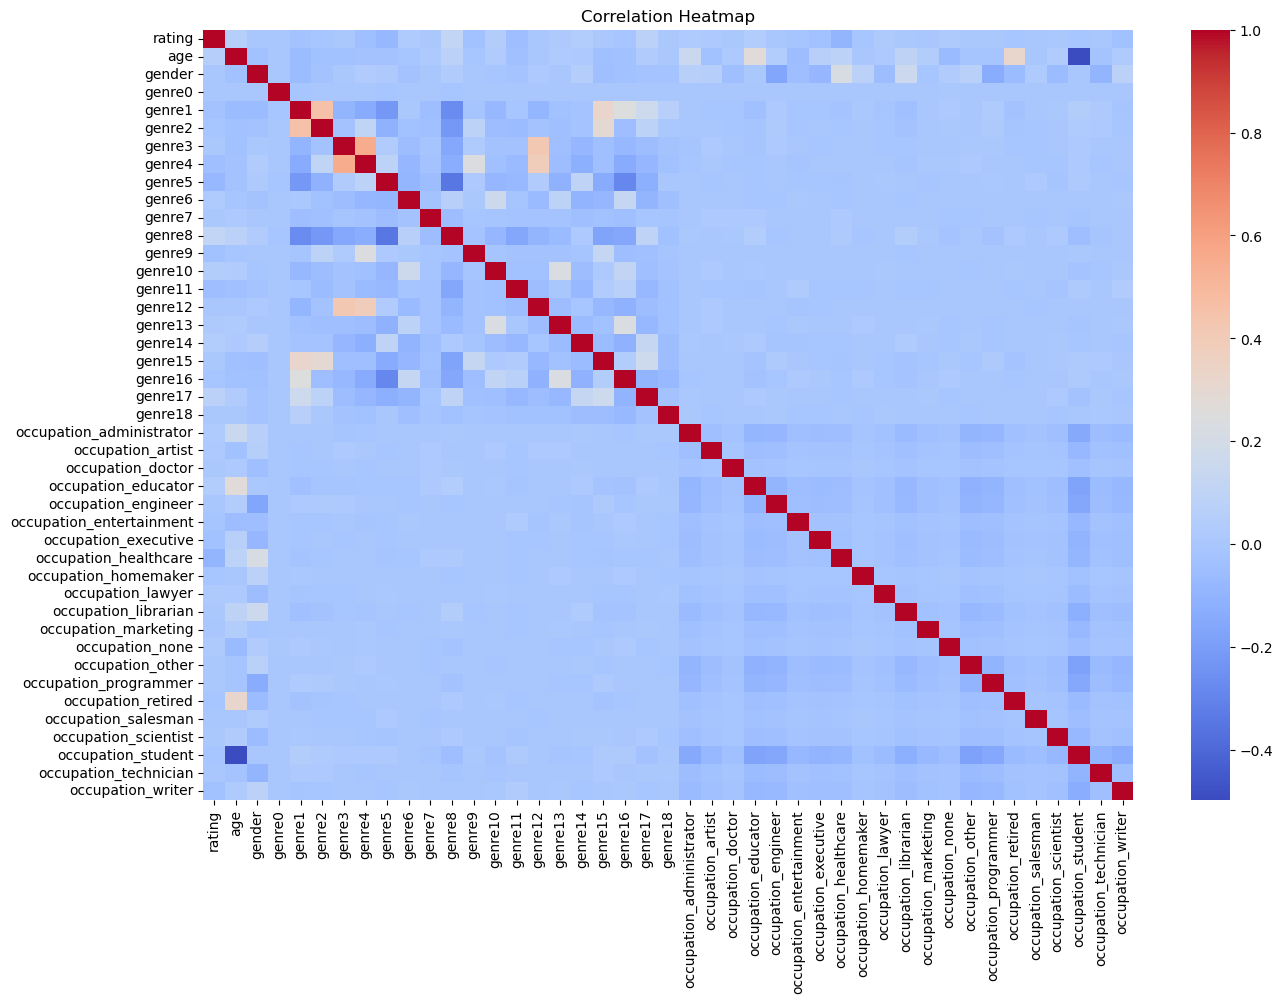

In [20]:
merged_df = pd.merge(ratings_df, users_df, on='user_id')
merged_df = pd.merge(merged_df, movies_df, on='movie_id')
merged_df['gender'] = merged_df['gender'].map({'M': 0, 'F': 1})
occupation_dummies = pd.get_dummies(merged_df['occupation'], prefix='occupation')
merged_df = pd.concat([merged_df, occupation_dummies], axis=1)
heatmap_columns = ['rating', 'age', 'gender'] + genre_columns + list(occupation_dummies.columns)
heatmap_data = merged_df[heatmap_columns]
heatmap_corr = heatmap_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()